  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
doing group
   year     totalprod
0  1998  5.105093e+06
1  1999  4.706674e+06
2  2000  5.106000e+06
3  2001  4.221545e+06
4  2002  3.892386e+06
doing total prod per year


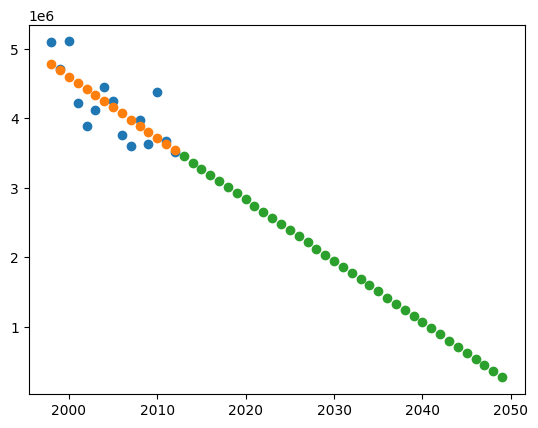

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("sampledata/honeyproduction.csv")

print(df.head())
print('doing group')
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year.head())
print('doing total prod per year')

x = prod_per_year['year']

x = x.values.reshape(-1,1)

y = prod_per_year['totalprod']
y = y.values.reshape(-1,1)


plt.scatter(x,y)


regr = linear_model.LinearRegression()

regr.fit(x,y)
m = regr.coef_
b = regr.intercept_

y_predict = [i*m + b for i in x]

plt.scatter(x,y_predict)


X_future = np.array(range(2013,2050))
X_future = X_future.reshape(-1,1)

future_predict = [i * m + b for i in X_future]
plt.scatter(X_future, future_predict)
plt.show()